In [1]:
import pandas as pd

# Load the air quality dataset
df = pd.read_csv('city_day.csv')
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
# Check the shape of the dataset (rows, columns)
print("Shape:", df.shape)

# View column names and data types
print("\nColumns and data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Shape: (29531, 16)

Columns and data types:
City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

Missing values per column:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [3]:
print("Cities in dataset:", df['City'].nunique())
print(df['City'].unique()[:10])  # Show first 10 unique cities

print("\nYears in dataset:", df['Date'].apply(lambda x: x[:4]).unique())


Cities in dataset: 26
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore']

Years in dataset: ['2015' '2016' '2017' '2018' '2019' '2020']


In [4]:
# Basic statistics for numeric columns
df.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Matplotlib is building the font cache; this may take a moment.


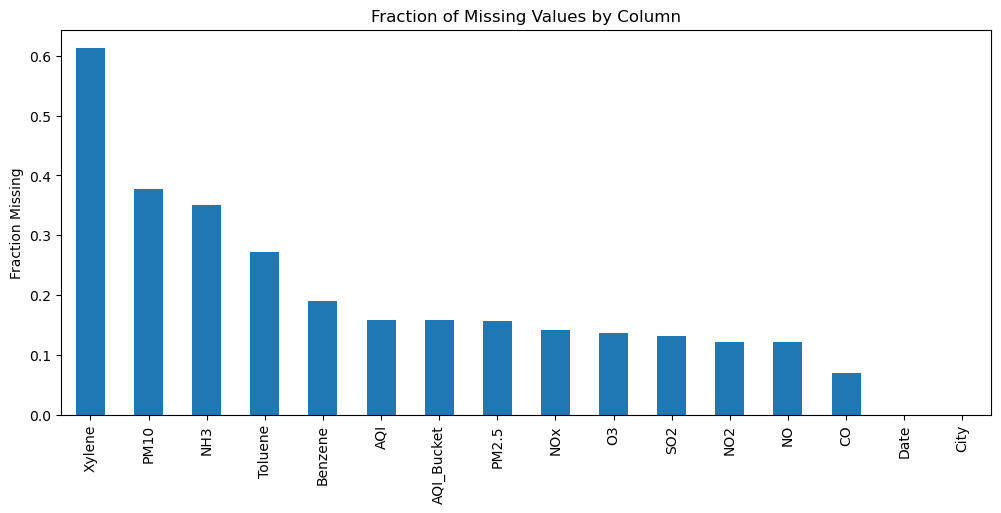

In [5]:
import matplotlib.pyplot as plt

# Plot missing values as a bar chart
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title('Fraction of Missing Values by Column')
plt.ylabel('Fraction Missing')
plt.show()


In [6]:
# Drop columns with more than 50% missing values
df_clean = df.loc[:, df.isnull().mean() < 0.5]

print("Columns kept:", df_clean.columns.tolist())


Columns kept: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket']


In [7]:
# Drop all rows with any missing values (fastest way to get a clean dataset for EDA)
df_clean = df_clean.dropna()

print("Remaining shape after dropna:", df_clean.shape)


Remaining shape after dropna: (10654, 15)


In [8]:
print("Any missing left?", df_clean.isnull().sum().sum())


Any missing left? 0


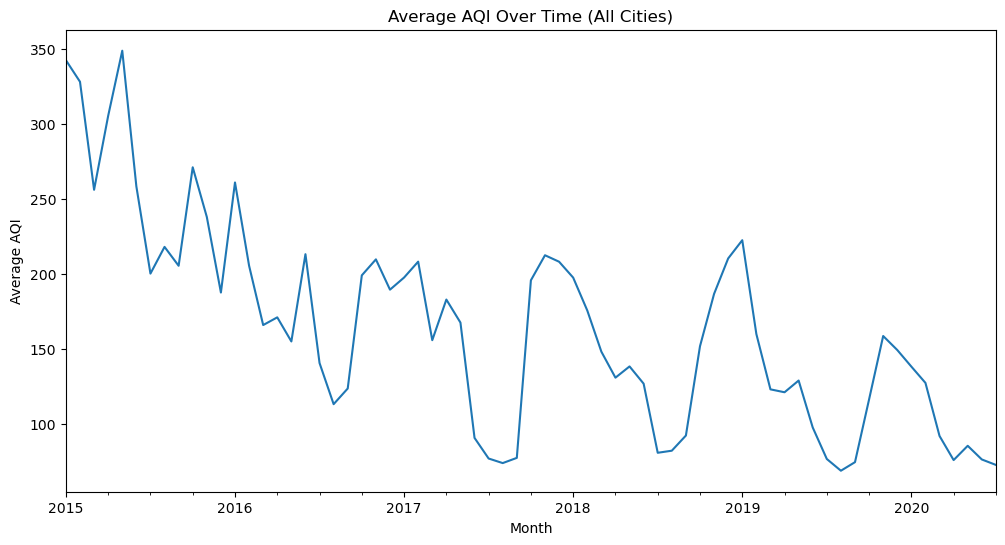

In [9]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Plot AQI over time (mean per month)
monthly_aqi = df_clean.groupby(df_clean['Date'].dt.to_period('M'))['AQI'].mean()
monthly_aqi.plot(figsize=(12,6))
plt.title('Average AQI Over Time (All Cities)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()


City
Delhi      268.916002
Talcher    182.975410
Patna      169.356021
Kolkata    141.104418
Jaipur     136.245000
Name: AQI, dtype: float64


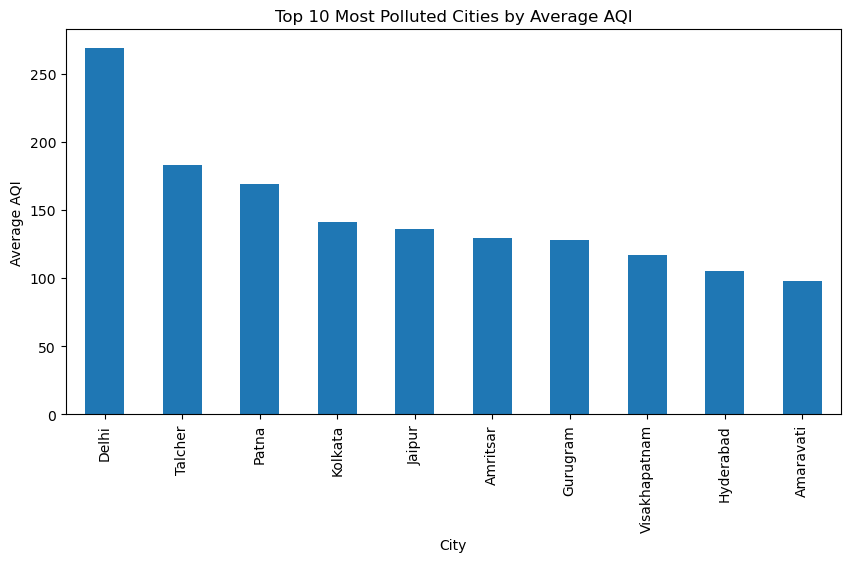

In [10]:
city_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)
print(city_aqi.head(5))

# Bar plot for the top 10 cities
city_aqi.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Most Polluted Cities by Average AQI')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()


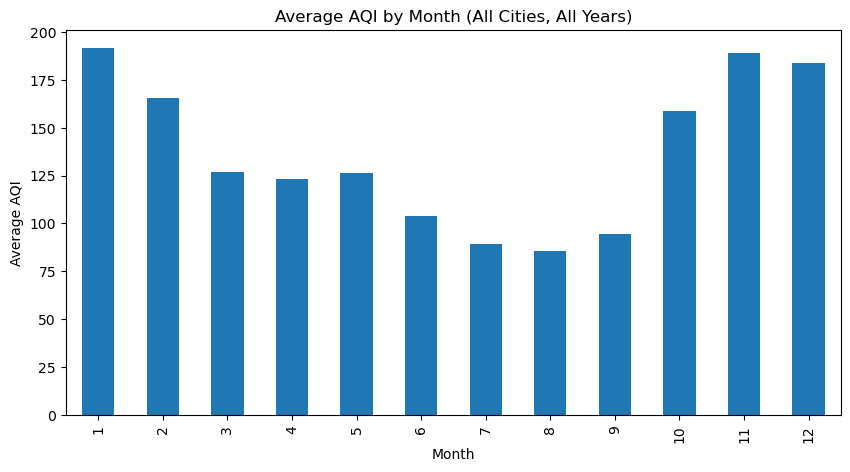

In [11]:
df_clean['Month'] = df_clean['Date'].dt.month
monthly_avg = df_clean.groupby('Month')['AQI'].mean()

monthly_avg.plot(kind='bar', figsize=(10,5))
plt.title('Average AQI by Month (All Cities, All Years)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()


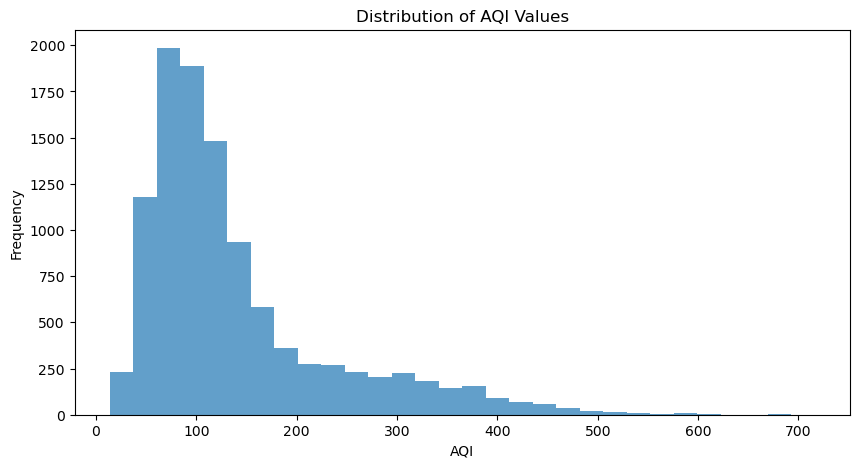

In [12]:
df_clean['AQI'].plot(kind='hist', bins=30, figsize=(10,5), alpha=0.7)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.show()


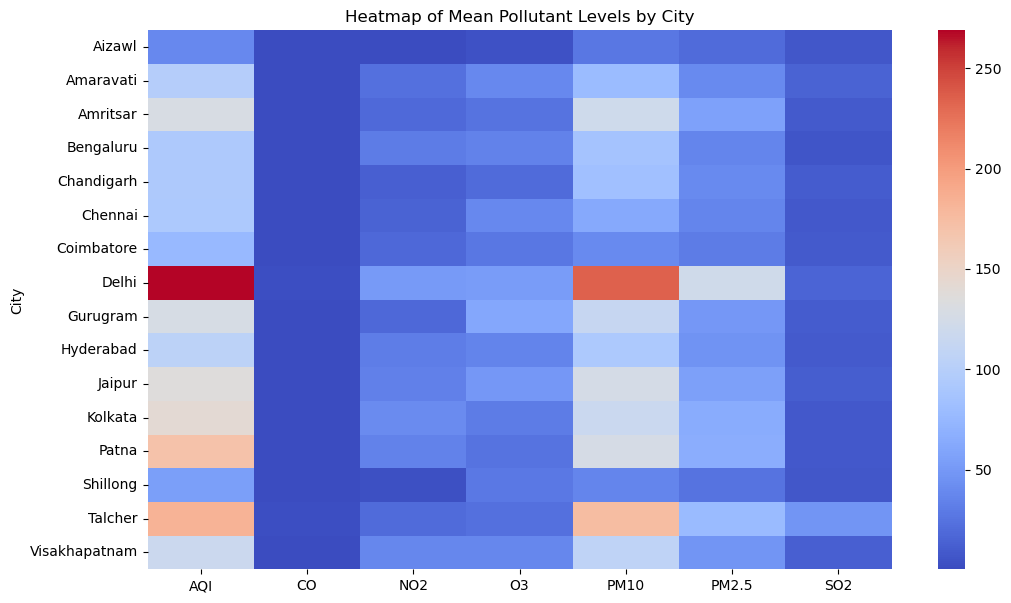

In [13]:
import seaborn as sns

# Pivot: Cities as rows, Pollutants as columns, values are means
pivot = df_clean.pivot_table(index='City',
                             values=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI'],
                             aggfunc='mean')

plt.figure(figsize=(12,7))
sns.heatmap(pivot, annot=False, cmap='coolwarm')
plt.title('Heatmap of Mean Pollutant Levels by City')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_8052\3531268301.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  city_data['AQI'].resample('M').mean().plot(figsize=(12,6))


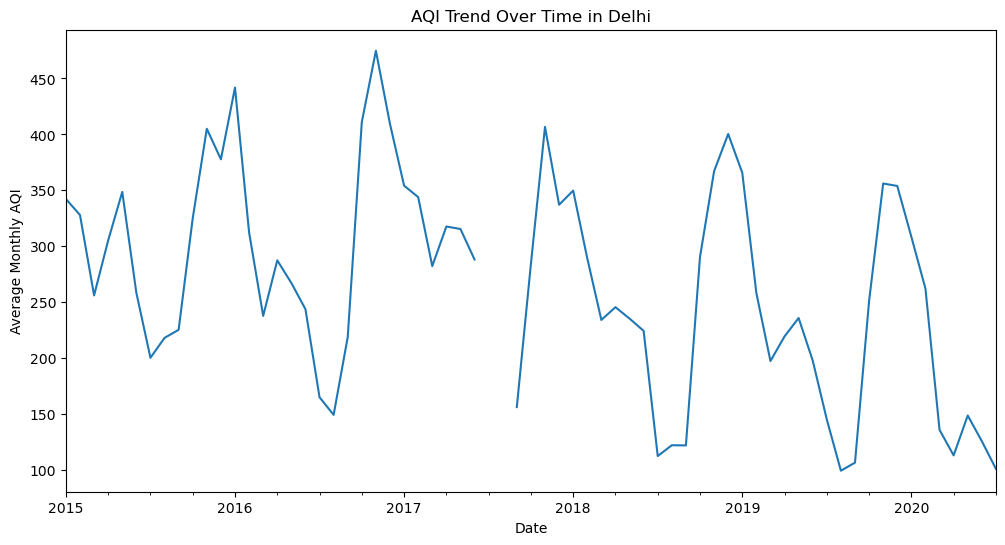

In [14]:
city = 'Delhi'  # Change to any city from your dataset

city_data = df_clean[df_clean['City'] == city]
city_data = city_data.set_index('Date').sort_index()

# Plot AQI over time
city_data['AQI'].resample('M').mean().plot(figsize=(12,6))
plt.title(f'AQI Trend Over Time in {city}')
plt.ylabel('Average Monthly AQI')
plt.xlabel('Date')
plt.show()


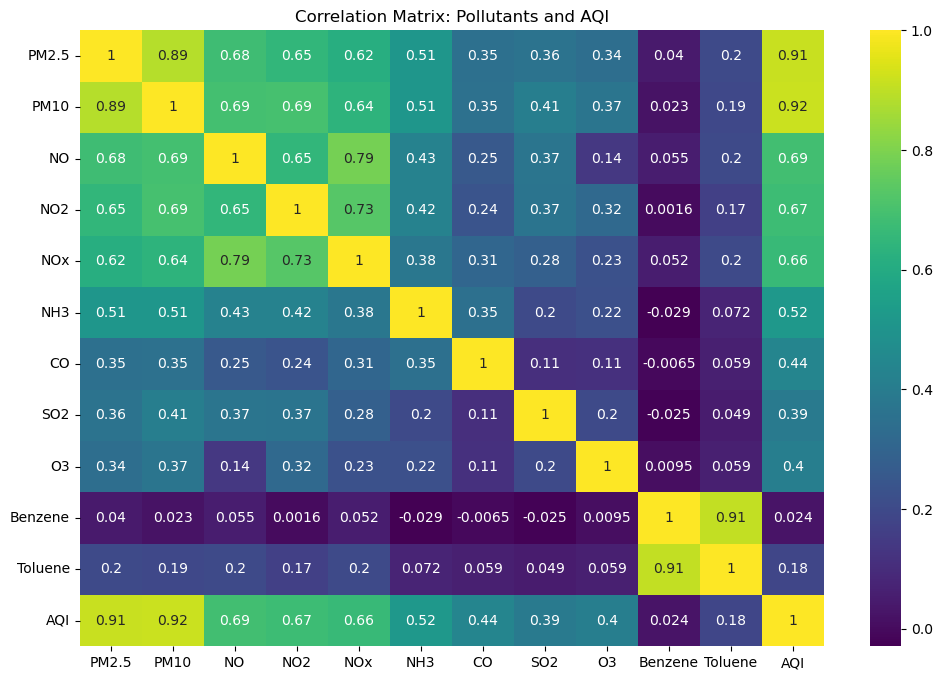

In [15]:
# Compute correlation between numeric columns
corr = df_clean[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix: Pollutants and AQI')
plt.show()


In [16]:
df_clean.to_csv('cleaned_air_quality.csv', index=False)
